In [1]:
import numpy as np
import math
import cmath
import cPickle
import re
import os as os
import zmq
import time
import copy
import operator
import argparse
import psutil
import warnings
import sys
import os
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

import kali
import kali.simulationLC
#import kali.s82
import kali.carma
import kali.util.mcmcviz as mcmcviz
#from kali.util.mpl_settings import set_plot_params
import kali.util.triangle as triangle
import palettable
import richardsplot as rplot

In [8]:
import kali.simLC_SDSS
jiangSimLC =  kali.simLC_SDSS.csvLC(name='sim0001', path = '/Users/Jackster/Research/code/jiangSim/', downsampled=0,
                             sdssLC = '111332', stationary = True)
jiangSimLC_differenced =  kali.simLC_SDSS.csvLC(name='sim0001', path = '/Users/Jackster/Research/code/jiangSim/', downsampled=0,
                             sdssLC = '111332', stationary = False)

Filepath is /Users/Jackster/Research/code/jiangSim/sim0001
The min time lag is 0.057304
Filepath is /Users/Jackster/Research/code/jiangSim/sim0001
The min time lag is 0.057304


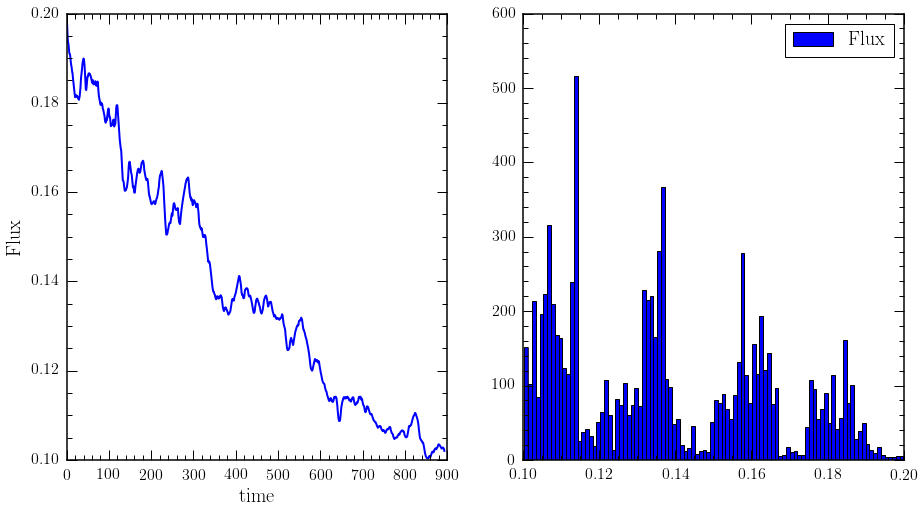

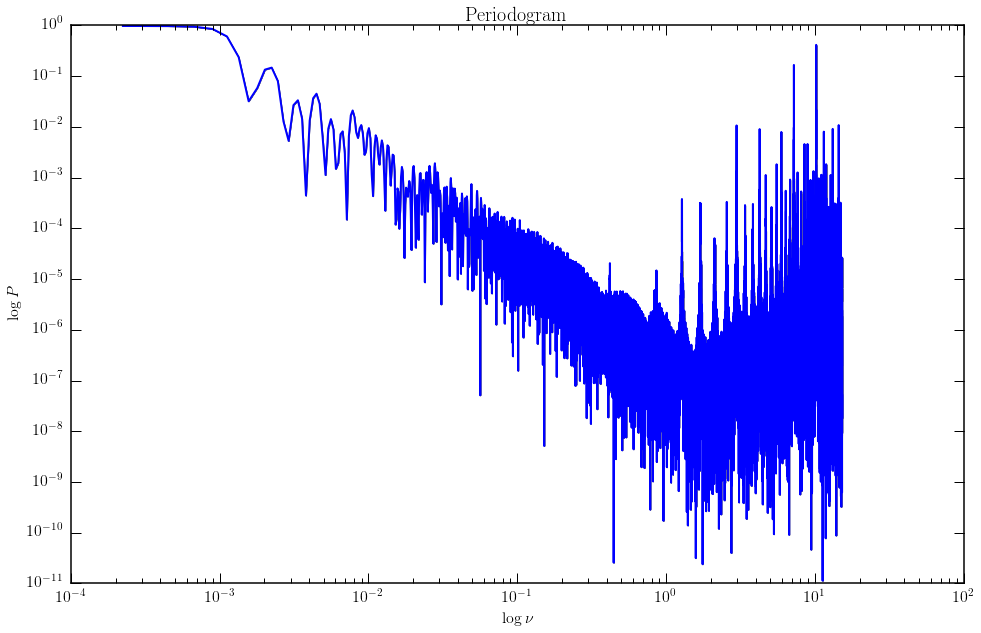

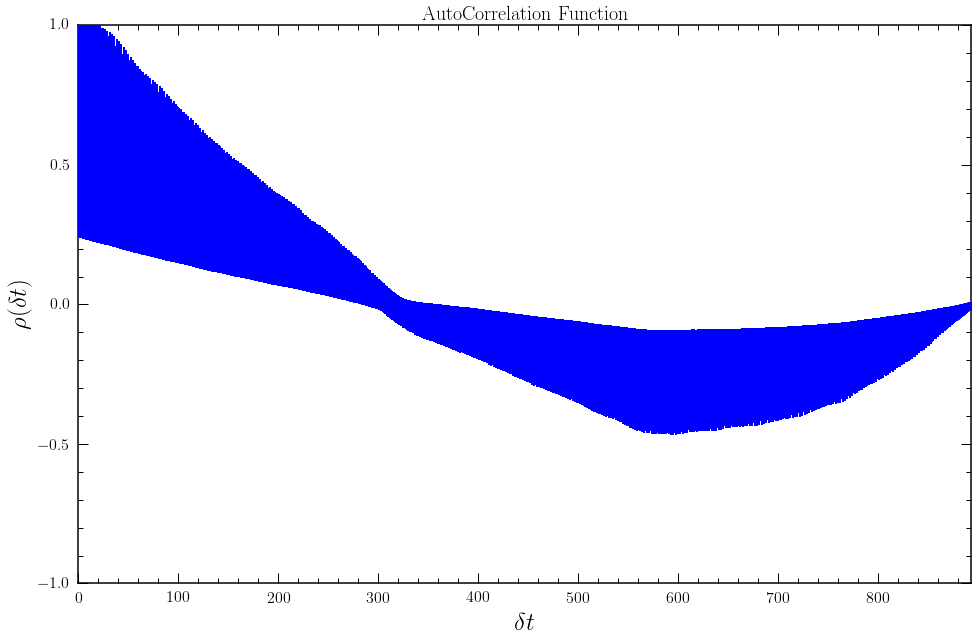

In [49]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 8))
ax1.plot(jiangSimLC.t, jiangSimLC.y)
ax2 = plt.hist(jiangSimLC.y, bins = 100,label = 'Flux' )
plt.legend(fontsize = 20)
ax1.set_xlabel('time',fontsize = 20)
ax1.set_ylabel('Flux',fontsize = 20)
a = jiangSimLC.plotperiodogram(colory = 'blue')
a2 = jiangSimLC.plotacf(colory = 'blue')


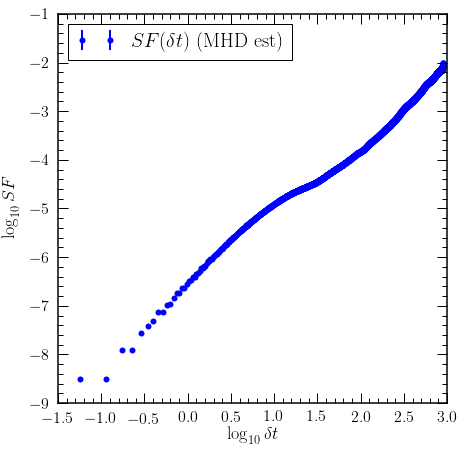

In [28]:
lagsEst, sfEst, sferrEst = jiangSimLC.sf()
plt.errorbar(np.log10(lagsEst),np.log10(sfEst), sferrEst, label=r'$SF(\delta t)$ (MHD est)',
             fmt='o', capsize=0, color='blue', markeredgecolor='none', zorder=0)
#errorbars for MHD data are 1% errors ()
plt.xlabel(r'$\log_{10}\delta t$', fontsize = 18)
plt.ylabel(r'$\log_{10} SF$',fontsize = 18 )
plt.legend(loc=2, fontsize = 20)
#plt.ylim([0, 0.006])

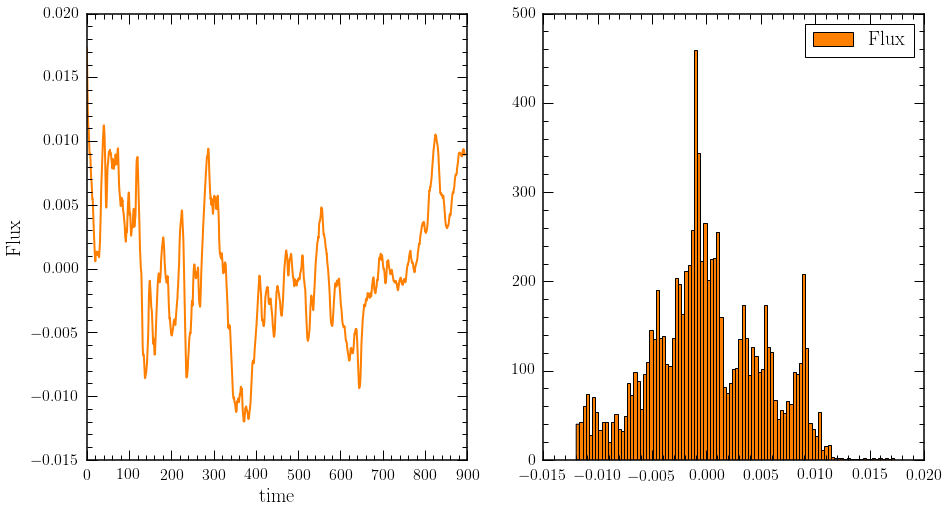

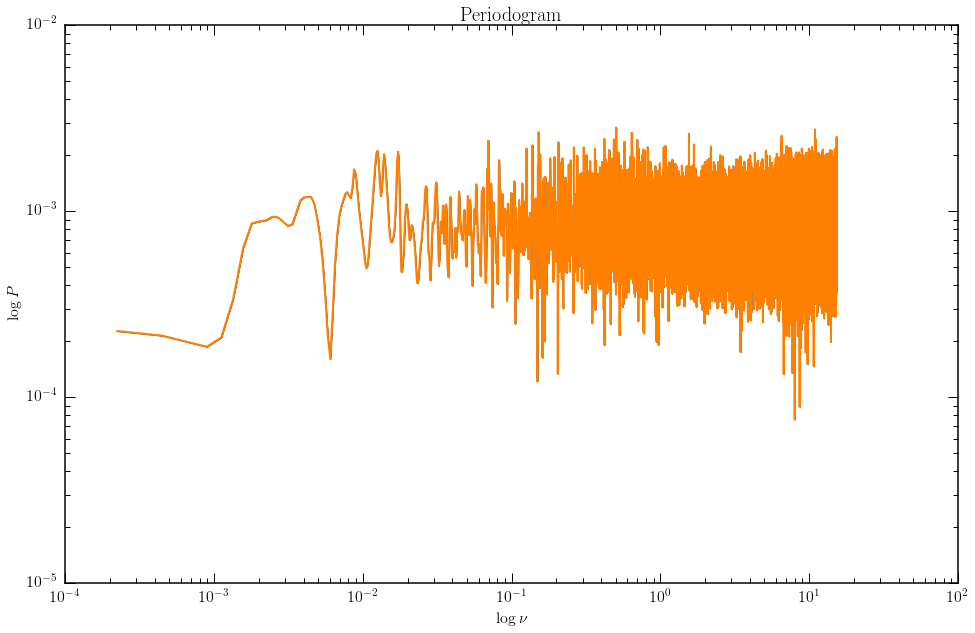

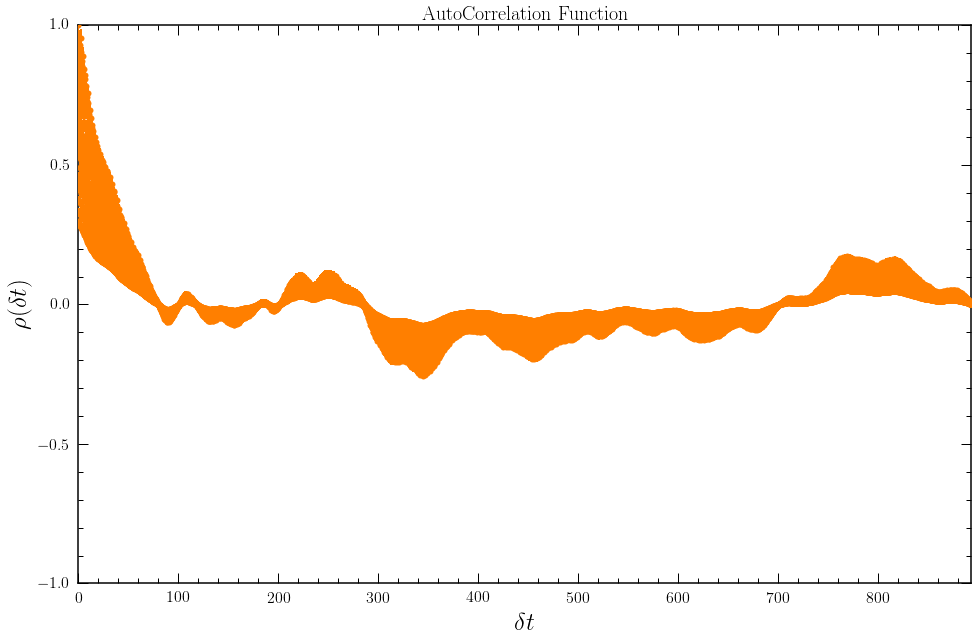

In [50]:

g, (ax1,ax2) = plt.subplots(1,2, figsize = (15,8))
ax1.plot(jiangSimLC_differenced.t, jiangSimLC_differenced.y, c = '#ff7f00')
ax2 = plt.hist(jiangSimLC_differenced.y, bins = 100, color = '#ff7f00',label = 'Flux' )
plt.legend(fontsize = 20)
ax1.set_xlabel('time',fontsize = 20)
ax1.set_ylabel('Flux',fontsize = 20)
b = jiangSimLC_differenced.plotperiodogram()
b2 = jiangSimLC_differenced.plotacf()

# above we have band limited white noise or white noise with autocorrelation

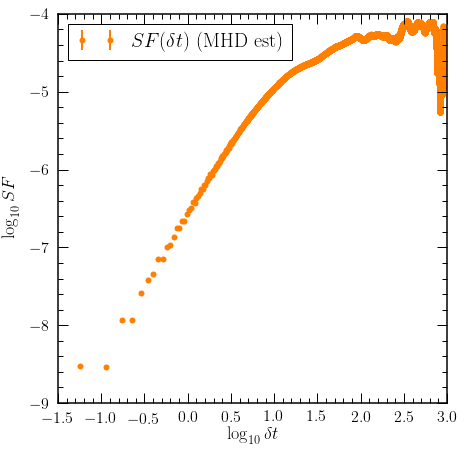

In [25]:
lagsEst, sfEst, sferrEst = jiangSimLC_differenced.sf()
plt.errorbar(np.log10(lagsEst),np.log10(sfEst), sferrEst, label=r'$SF(\delta t)$ (MHD est)',
             fmt='o', capsize=0, color='#ff7f00', markeredgecolor='none', zorder=0)
#errorbars for MHD data are 1% errors ()
plt.xlabel(r'$\log_{10}\delta t$', fontsize = 18)
plt.ylabel(r'$\log_{10} SF$',fontsize = 18 )
plt.legend(loc=2, fontsize = 20)
